# Optimization and the Efficient Frontier

In [99]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import collin_risk as collin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
daily_returns = collin.get_stock_return_data(stocks = ['SPY', 'DIA'], start_date = '2018-01-01')
cum_returns = collin.get_stock_cum_return_data(stocks = ['SPY', 'DIA'], start_date = '2018-01-01')
covmat = collin.get_stock_return_data(stocks = ['SPY', 'DIA'], start_date = '2018-01-01').cov()
ann_returns = collin.annualized_data(daily_returns)['Annualized Returns']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Vol', ylabel='R'>

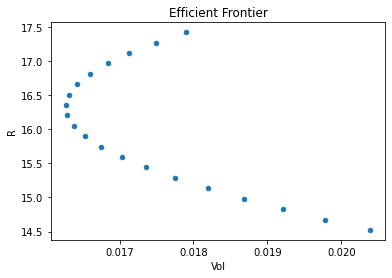

In [12]:
collin.plot_efficient_frontier_2(stocks = ['AMZN', 'AAPL'], start_date = '2010-01-01')

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Vol', ylabel='R'>

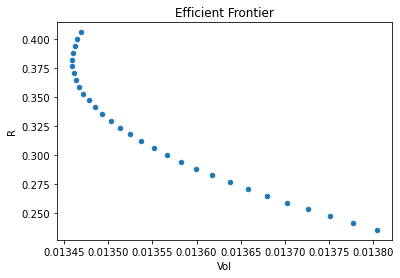

In [75]:
collin.plot_ef(cum_returns, covmat, n_points = 30)

In [88]:
collin.annualized_data(daily_returns)

,Annualized Returns,Annualized Volatility
SPY,0.078245,0.213723
DIA,0.047835,0.219038


In [77]:
collin.maximize_sharpe_ratio(cum_returns, covmat, risk_free_rate = 0.03)

array([1., 0.])

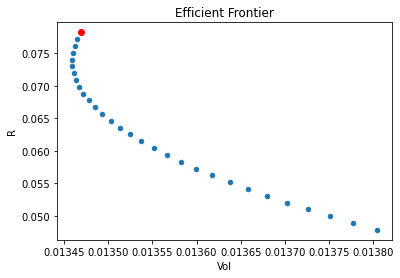

In [108]:
collin.max_sharpe_plot(ann_returns, covmat, risk_free_rate = 0.03)

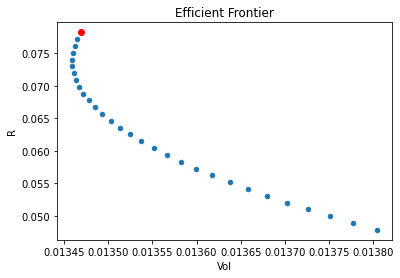

In [112]:
plot = collin.plot_ef(ann_returns, covmat, n_points = 30)
#plot.set_xlim(left=0)
risk_free_rate = risk_free_rate
w_msr = collin.maximize_sharpe_ratio(ann_returns, covmat, risk_free_rate)
r_msr = collin.portfolio_return(w_msr, ann_returns)
vol_msr = collin.portfolio_vol(w_msr, covmat)
# Add CML (capital market line)
#cml_x = [0, vol_msr]
#cml_y = [risk_free_rate, r_msr]
cml_x = [vol_msr]
cml_y = [r_msr]
plot.plot(cml_x, cml_y, color = 'red', marker = 'o', linestyle = 'dashed', markersize =10)

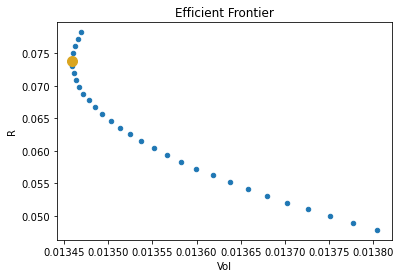

In [137]:
collin.plot_gmv(ann_returns, covmat)